#**Dataset Description**

The dataset contains information on various loan applications. It includes both qualitative and quantitative features that are used to predict the loan status (Approved or Rejected).

<br>

**Number of Features**:

The dataset contains a total of 13 features (including the target variable loan_status).

<br>

**Qualitative Features**: Categorical Variables

*   **education**: Whether the applicant is a Graduate or Not Graduate.
*   **self_employed**: Whether the applicant is self-employed or not.
*   **loan_status**: The status of the loan (Approved or Rejected) - this is the target variable.

<br>

**Quantitative Features**: Numerical Variables.

*   **no_of_dependents**: Number of dependents the applicant has
*   **income_annum**: Annual income of the applicant.
*   **loan_amount**: The amount of the loan requested.
*   **loan_term**: The term of the loan in years.
*   **cibil_score**: The applicant’s CIBIL score.
*   **residential_assets_value**: Value of the applicant’s residential assets.
*   **commercial_assets_value**: Value of the applicant’s commercial assets.
*   **luxury_assets_value**: Value of the applicant’s luxury assets.
*   **bank_asset_value**: Value of the applicant’s bank assets.

<br>

**Number of Observations**:

The dataset contains a total of 4269 observations.

<br>

**Dependent Feature**:

*    **loan_status** - It indicates whether a loan is approved or rejected

<br>

**Independent Features**:
1. no_of_dependents
2. education
3. self_employed
4. income_annum
5. loan_amount
6. loan_term
7. cibil_score
8. residential_assets_value
9. commercial_assets_value
10. luxury_assets_value
11. bank_asset_value

<br>

Dataset used is Loan-Approval-Prediction-Dataset

https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data

# **Load the dataset**

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt


data = pd.read_csv("loan_approval_dataset.csv")
data.head(3)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected


## **Statistics for quantitative features**

In [27]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## **Qualitative feature unique values**

In [28]:
# Define the qualitative features
qualitative_features = [' education', ' self_employed', ' loan_status']

for feature in qualitative_features:
    unique_values = data[feature].unique()
    print(f"Unique values for {feature}: {unique_values}")

Unique values for  education: [' Graduate' ' Not Graduate']
Unique values for  self_employed: [' No' ' Yes']
Unique values for  loan_status: [' Approved' ' Rejected']


In [29]:
data.describe(include=[object])

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


## **Class Distribution**

Class Distribution:
 loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64


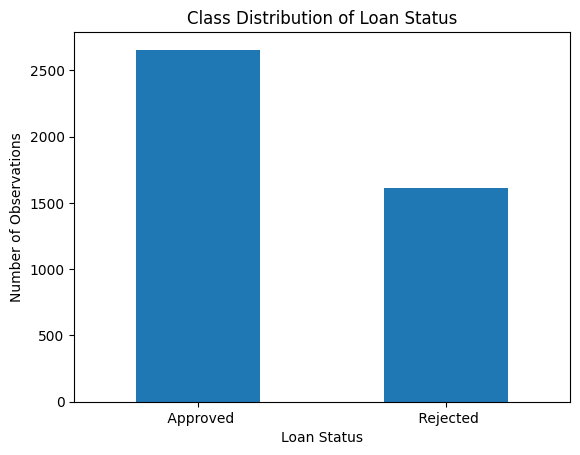

In [30]:
# Display class distribution
import matplotlib.pyplot as plt
class_counts = data[' loan_status'].value_counts()
print("Class Distribution:")
print(class_counts)

class_counts.plot(kind='bar')
plt.title('Class Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)
plt.show()

#**Preparing dataset for Machine Learning**

In [31]:
data.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [32]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [33]:
#Removing unnecessary loan_id column
data.drop(columns=['loan_id'], inplace=True)

In [34]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [35]:
data.shape

(4269, 12)

In [36]:
#Number of missing values in each column
data.isna().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [37]:
#Convert object to categorical data type
categorical_column_names=[" education", " self_employed", " loan_status"]
data[categorical_column_names] = data[categorical_column_names].apply(pd.Categorical)

In [38]:
data.dtypes

 no_of_dependents               int64
 education                   category
 self_employed               category
 income_annum                   int64
 loan_amount                    int64
 loan_term                      int64
 cibil_score                    int64
 residential_assets_value       int64
 commercial_assets_value        int64
 luxury_assets_value            int64
 bank_asset_value               int64
 loan_status                 category
dtype: object

In [39]:
#One-hot encoding
data = pd.get_dummies(data, columns=categorical_column_names, drop_first=True, dtype = int)
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1


In [40]:
#Renaming encoded columns
data.rename(columns={' self_employed_ Yes': ' self_employed'}, inplace=True)
data.rename(columns={' education_ Not Graduate': ' education'}, inplace=True)
data.rename(columns={' loan_status_ Rejected': ' loan_status'}, inplace=True)


##**Check if Dataset is Balanced**

In [41]:
target_counts = data[' loan_status'].value_counts()
print(target_counts)

 loan_status
0    2656
1    1613
Name: count, dtype: int64


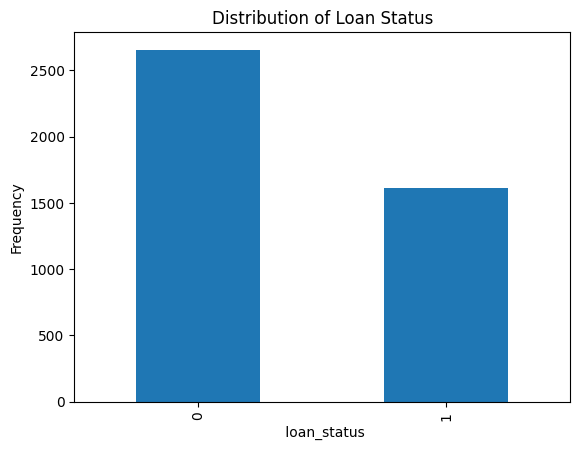

In [42]:
 target_counts.plot(kind='bar')
 plt.xlabel(' loan_status')
 plt.ylabel('Frequency')
 plt.title('Distribution of Loan Status')
 plt.show()

In [43]:
data.columns

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' education',
       ' self_employed', ' loan_status'],
      dtype='object')

In [44]:
#Save transformed data
data.to_csv('transformed_data.csv', index=False)
data

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,1,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1,0
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0,1
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,0,0


#**Split data into train and test sets for modeling**

In [45]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = [" loan_status"], axis=1)
y = data[" loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("Size X_train", X_train.shape)
print("Size X_test", X_test.shape)
print("Size y_train", y_train.shape)
print("Size y_test", y_test.shape)

Size X_train (3415, 11)
Size X_test (854, 11)
Size y_train (3415,)
Size y_test (854,)


In [46]:
#Number of duplicated rows in the DataFrame X
X.duplicated().sum()

0

##**Testing Different Classifiers**

In [49]:
#Classifier Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

#Cross-Validation and Metric Calculation
results = {}

for name, clf in classifiers.items():
    cv_accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    cv_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision')
    cv_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall')
    cv_f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')

    results[name] = {
        'Accuracy': np.mean(cv_accuracy),
        'Precision': np.mean(cv_precision),
        'Recall': np.mean(cv_recall),
        'F1 Score': np.mean(cv_f1)
    }

#Model Comparison
results_df = pd.DataFrame(results).T
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.643045   0.497778  0.083739  0.113001
Decision Tree           0.973353   0.963105  0.965774  0.964320
Random Forest           0.979209   0.976551  0.968881  0.975045
Gradient Boosting       0.979502   0.972874  0.972769  0.972813
Support Vector Machine  0.623426   0.000000  0.000000  0.000000


In [50]:
#Select best model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

RandomForestClassifier()

## **Model Evaluation**

In [57]:
import joblib

# Make predictions on the test data
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Save the trained model to a file
joblib.dump(best_model, 'model.pkl')

Accuracy: 0.9813
Precision: 0.9785
Recall: 0.9725
F1 Score: 0.9755


['model.pkl']

##**Confusion Matrix and Classification Report**

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print(cm)

from sklearn import metrics
from sklearn.metrics import classification_report

#calculating metrics
print("Metrics")
print(classification_report(y_test, y_pred, target_names=["Nie","Tak"]))

[[520   7]
 [  9 318]]
Metrics
              precision    recall  f1-score   support

         Nie       0.98      0.99      0.98       527
         Tak       0.98      0.97      0.98       327

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

